In [1]:
from circuits.cp_fraction import cp_fraction
from GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from FM_methods import set_initial_partitions
from qiskit.circuit.library import QFT, QuantumVolume
from circuits.QAOA import QAOA_random
from FM_main import *

num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5 )

# circuit = QFT(num_qubits, do_swaps=False)

# circuit = QuantumVolume(num_qubits, depth=10)

# circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

circuit = transpile(circuit, basis_gates = ['cp', 'u'])

depth = circuit.depth() + 2

graph = QuantumCircuitHyperGraph(num_qubits=num_qubits, depth=depth)
graph.map_circuit_to_hypergraph(circuit, group_gates=True)

assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced = True)



                                            

In [2]:
import time 
curtailment = [1 - i*0.05 for i in range(20)]

l = []
t = []

list_costs = []

iterations = 5

for c in curtailment:
    print("Curtailment: ", c)
    start = time.time()
    cost_total = 0
    for i in range(iterations):
        cost, assignment_list, cost_list = run_main_algorithm(hypergraph=graph, 
                                                        initial_assignment=assignment,
                                                        qpu_info=qpu_info,
                                                        num_qubits=num_qubits,
                                                        num_partitions=num_partitions,
                                                        limit = num_qubits*depth*c,
                                                        max_gain=4,
                                                        passes=100,
                                                        stochastic=True,
                                                        log=True)
        cost_total += cost
        print(f'Cost for iteration {i}: {cost}')
    end = time.time()
    print("Average time: ", (end - start)/iterations)
    timer = (end - start)/iterations
    cost = cost_total/iterations 
    print("Average cost: ", cost)
    l.append(cost)
    t.append(timer)
    list_costs.append(cost_list)


    



Curtailment:  1.0
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 0: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 1: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 2: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 3: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 4: 157
Average time:  155.3027955532074
Average cost:  157.0
Curtailment:  0.95
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 0: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 1: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 2: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 3: 157
Initial cost: 157
All passes complete.
Final cost: 157
Cost for iteration 4: 157
Average time:  105.79239239692689
Average cost:  157.0
Curtailment:  0.9
Initial cost: 157
All pass

KeyboardInterrupt: 

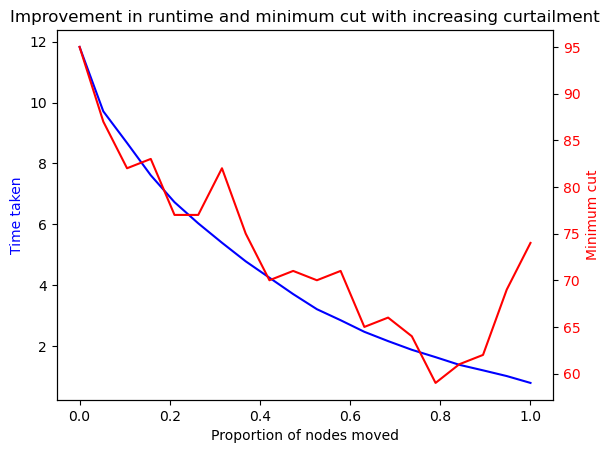

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 20)
y1 = t           # Data for left y-axis
y2 = l     # Data for right y-axis

fig, ax1 = plt.subplots()

# Plot y1 against x using the primary y-axis (on the left)
ax1.plot(x, y1, color="blue", label="Runtime")
ax1.set_xlabel("Proportion of nodes moved")
ax1.set_ylabel("Time taken", color="blue")

# Create a "twin" of the first Axes, i.e., share the same x-axis but have a new y-axis on the right
ax2 = ax1.twinx()
ax2.plot(x, y2, color="red", label="Minimum cut")
ax2.set_ylabel("Minimum cut", color="red")

# Optional: Make sure the second y-axis labels are in red
for tl in ax2.get_yticklabels():
    tl.set_color("red")

plt.title("Improvement in runtime and minimum cut with increasing curtailment")
plt.show()

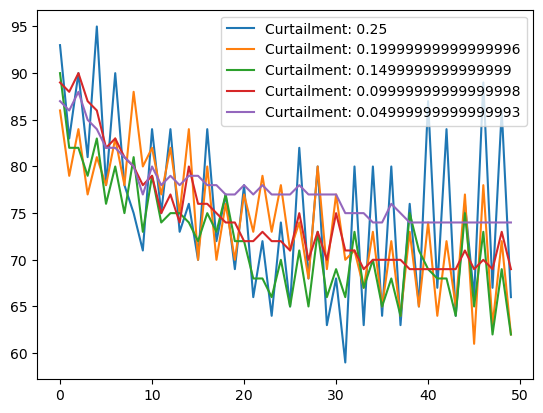

In [57]:
indeces = [i for i in range(15,20)]


for i in indeces:
    plt.plot(list_costs[i], label = "Curtailment: " + str(curtailment[i]))
plt.legend()

In [ ]:
import time 
curtailment = [1 - i*0.05 for i in range(20)]

l = []
t = []

list_costs = []

for c in curtailment:
    print("Curtailment: ", c)
    start = time.time()
    cost, assignment_list, cost_list = run_main_algorithm(hypergraph=graph, 
                                                    initial_assignment=assignment,
                                                    qpu_info=qpu_info,
                                                    num_qubits=num_qubits,
                                                    num_partitions=num_partitions,
                                                    limit = num_qubits*depth*c,
                                                    max_gain=4,
                                                    passes=50,
                                                    stochastic=True,
                                                    log=True)
    end = time.time()
    print("Time: ", end - start)
    timer = end - start
    
    l.append(cost)
    t.append(timer)
    list_costs.append(cost_list)


    



Curtailment:  1.0
Initial cost: 86
All passes complete.
Final cost: 92
Time:  11.826259136199951
Curtailment:  0.95
Initial cost: 86
All passes complete.
Final cost: 91
Time:  9.72824501991272
Curtailment:  0.9
Initial cost: 86
All passes complete.
Final cost: 85
Time:  8.950143814086914
Curtailment:  0.85
Initial cost: 86
All passes complete.
Final cost: 81
Time:  8.184360027313232
Curtailment:  0.8
Initial cost: 86
All passes complete.
Final cost: 77
Time:  7.038631916046143
Curtailment:  0.75
Initial cost: 86
All passes complete.
Final cost: 75
Time:  6.429373025894165
Curtailment:  0.7
Initial cost: 86
All passes complete.
Final cost: 74
Time:  5.819391965866089
Curtailment:  0.6499999999999999
Initial cost: 86
All passes complete.
Final cost: 76
Time:  5.042821168899536
Curtailment:  0.6
Initial cost: 86
All passes complete.
Final cost: 76
Time:  4.429688930511475
Curtailment:  0.55
Initial cost: 86
All passes complete.
Final cost: 69
Time:  3.8706350326538086
Curtailment:  0.5
In